#Preprocessing and EDA#


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import requests
from google.colab import drive

drive.mount('/content/gdrive')  # Connect to your Google Drive account

data_dir = '/content/gdrive/MyDrive/audio_data2'  # Update with your data directory in Google Drive



Mounted at /content/gdrive


In [ ]:
import requests
import json
import pandas as pd

# Species list
species_list = ['Grey francolin', 'Purple sunbird', 'Common Tailorbird', 'Red-vented Bulbul', 'Indian Bush Lark', 'Siberian Stonechat ', 'Bay-backed Shrike', 'Indian roller', 'Indian Peafowl', 'Plain Prinia']
species_list.append('Tawny Pipit')
species_list.append('Common Babbler')
species_list.append('White-eared Bulbul')
species_list.append('Tawny Pipit')
species_list.append("Wire-tailed Swallow")
species_list.append("Indian Black-lored Tit")
species_list.append("Northern Raven")

species_list.append("Hume's Leaf Warbler")
# Create empty dataframe
df = pd.DataFrame(columns=['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng', 'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used'])

# Loop through species list and extract data
for species in species_list:
    query = f'https://www.xeno-canto.org/api/2/recordings?query={species}%20cnt:India'
    response = requests.get(query)
    if response.status_code == 200:
        data = response.json()
        temp_df = pd.json_normalize(data['recordings'])
        df = pd.concat([df, temp_df], ignore_index=True)

# Save as CSV
df.to_csv('indian_species.csv', index=False)


In [ ]:
df=df [['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng', 'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used']]

In [ ]:
df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,796874,Ortygornis,pondicerianus,,Grey Francolin,Barry Edmonston,India,"Jaisalmer (near Kanoi), Jodhpur Division, Raj...",26.8209,70.5272,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:37,08:00,2023-01-29,2023-04-29,[],,yes,no
1,775466,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Ghasaula, Bharatpur, Rajasthan",27.1599,77.5418,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:09,17:15,1986-02-15,2023-01-14,"[Psittacula krameri, Spilopelia senegalensis]",At Eastern Boundary\r\n,yes,no
2,706170,Ortygornis,pondicerianus,interpositus,Grey Francolin,Kousheyo Bagchi,India,"Barshul Birding Hotspot, Bardhaman, West Bengal",23.175,87.9566,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:11,16:00,2021-10-03,2022-03-05,[],Dry vegetations around R. Damodar. Eastern edg...,unknown,unknown
3,667224,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1536,77.5465,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,1:38,18:00,1986-02-11,2021-08-09,"[Ficedula parva, Argya striata]",Several birds on ground calling from many dire...,yes,no
4,667223,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1536,77.5465,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:45,11:30,1986-02-11,2021-08-09,"[Corvus splendens, Psittacula krameri, Spilope...",Several birds on ground calling from different...,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,105580,Phylloscopus,humei,,Hume's Leaf Warbler,Ante Strand,India,"Harike Lake, Punjab",31.1489,74.9448,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:19,?,2011-02-05,2012-07-10,[],,unknown,unknown
667,91910,Phylloscopus,humei,,Hume's Leaf Warbler,Ramit Singal,India,Delhi,28.6478,77.2098,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:05,09:15,2011-12-22,2011-12-22,[],Traffic in background,unknown,unknown
668,73381,Phylloscopus,humei,humei,Hume's Leaf Warbler,Mike Nelson,India,Sultanpur Bird Sanctuary,28.464,76.893,...,//creativecommons.org/licenses/by-nc-sa/3.0/,C,0:18,4:00pm,2011-03-06,2011-03-21,[],Several seen in the open forest along the trails,yes,no
669,19290,Phylloscopus,humei,mandellii,Hume's Leaf Warbler,Craig Robson,India,Shillong,25.56892,91.88313,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:33,?:?,0000-00-00,2008-11-20,[],,unknown,unknown


In [ ]:
np.unique(df['type'])

array(['', '?', 'aberrant, call, song', 'aberrant, hatchling or nestling',
       'aberrant, song', 'alarm call', 'alarm call, begging call',
       'alarm call, call', 'alarm call, call, flight call, song',
       'alarm call, call, song', 'alarm call, flight call',
       'begging call', 'begging call, two wheeler', 'call',
       'call, allrm call', 'call, call or song?', 'call, communication',
       'call, drumming', 'call, duet', 'call, flight call',
       'call, flight call, song', 'call, song',
       'call, song, call and song', 'call, song, contact call',
       'call, song, thermal power station in service',
       'call, teaching nestling how we call', 'call?', 'duet, song',
       'fight of 2 males', 'flight call', 'flight call, song',
       'imitation, song, imitation tits (parus spp) song', 'song',
       'song, immature male', 'song, rock bush', 'song, subsong',
       'uncertain'], dtype=object)

In [ ]:
df.to_csv('indian_species.csv', index=False)

In [ ]:
df = pd.DataFrame(df[df['type'].str.contains('call')])


In [ ]:
df['en'].unique()

array(['Grey Francolin', 'Purple Sunbird', 'Common Tailorbird',
       'Red-vented Bulbul', 'Indian Bush Lark', 'Siberian Stonechat',
       'Bay-backed Shrike', 'Indian Roller', 'Indian Peafowl',
       'Plain Prinia', 'Tawny Pipit', 'Common Babbler',
       'White-eared Bulbul', 'Wire-tailed Swallow',
       'Indian Black-lored Tit', 'Northern Raven', "Hume's Leaf Warbler"],
      dtype=object)

In [ ]:
len(df['en'].unique())

17

In [ ]:
df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,796874,Ortygornis,pondicerianus,,Grey Francolin,Barry Edmonston,India,"Jaisalmer (near Kanoi), Jodhpur Division, Raj...",26.8209,70.5272,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:37,08:00,2023-01-29,2023-04-29,[],,yes,no
7,472717,Ortygornis,pondicerianus,,Grey Francolin,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:16,07:30,2019-04-06,2019-05-10,[],,unknown,unknown
8,459199,Ortygornis,pondicerianus,,Grey Francolin,Vivek Puliyeri,India,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:12,07:00,2019-02-25,2019-02-25,[],,no,no
9,441379,Ortygornis,pondicerianus,,Grey Francolin,Sreekumar Chirukandoth,India,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:07,08:00,2018-10-14,2018-11-05,[Corvus splendens],An individual calling from the fields,yes,no
10,351857,Ortygornis,pondicerianus,,Grey Francolin,Oscar Campbell,India,"Bari, Udaipur, Rajasthan",24.6227,73.6597,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:21,08:30,2016-12-24,2017-01-22,[],Calling from dense scrub on edge of field on b...,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,105580,Phylloscopus,humei,,Hume's Leaf Warbler,Ante Strand,India,"Harike Lake, Punjab",31.1489,74.9448,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:19,?,2011-02-05,2012-07-10,[],,unknown,unknown
667,91910,Phylloscopus,humei,,Hume's Leaf Warbler,Ramit Singal,India,Delhi,28.6478,77.2098,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:05,09:15,2011-12-22,2011-12-22,[],Traffic in background,unknown,unknown
668,73381,Phylloscopus,humei,humei,Hume's Leaf Warbler,Mike Nelson,India,Sultanpur Bird Sanctuary,28.464,76.893,...,//creativecommons.org/licenses/by-nc-sa/3.0/,C,0:18,4:00pm,2011-03-06,2011-03-21,[],Several seen in the open forest along the trails,yes,no
669,19290,Phylloscopus,humei,mandellii,Hume's Leaf Warbler,Craig Robson,India,Shillong,25.56892,91.88313,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:33,?:?,0000-00-00,2008-11-20,[],,unknown,unknown


In [ ]:
df=df.drop(['ssp'], axis=1)


In [ ]:
df2=df.drop(['rmk'],axis=1)
df2.isnull().sum()

id                 0
gen                0
sp                 0
en                 0
rec                0
cnt                0
loc                0
lat                4
lng                4
alt                0
type               0
url                0
file               0
file-name          0
sono             462
lic                0
q                  0
length             0
time               0
date               0
uploaded           0
also               0
bird-seen          0
playback-used      0
dtype: int64

In [ ]:
df2

,id,gen,sp,en,rec,cnt,loc,lat,lng,alt,...,sono,lic,q,length,time,date,uploaded,also,bird-seen,playback-used
0,796874,Ortygornis,pondicerianus,Grey Francolin,Barry Edmonston,India,"Jaisalmer (near Kanoi), Jodhpur Division, Raj...",26.8209,70.5272,200,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:37,08:00,2023-01-29,2023-04-29,[],yes,no
7,472717,Ortygornis,pondicerianus,Grey Francolin,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,,...,NaN,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:16,07:30,2019-04-06,2019-05-10,[],unknown,unknown
8,459199,Ortygornis,pondicerianus,Grey Francolin,Vivek Puliyeri,India,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,10,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:12,07:00,2019-02-25,2019-02-25,[],no,no
9,441379,Ortygornis,pondicerianus,Grey Francolin,Sreekumar Chirukandoth,India,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,180,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:07,08:00,2018-10-14,2018-11-05,[Corvus splendens],yes,no
10,351857,Ortygornis,pondicerianus,Grey Francolin,Oscar Campbell,India,"Bari, Udaipur, Rajasthan",24.6227,73.6597,600,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:21,08:30,2016-12-24,2017-01-22,[],no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,105580,Phylloscopus,humei,Hume's Leaf Warbler,Ante Strand,India,"Harike Lake, Punjab",31.1489,74.9448,?,...,NaN,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:19,?,2011-02-05,2012-07-10,[],unknown,unknown
667,91910,Phylloscopus,humei,Hume's Leaf Warbler,Ramit Singal,India,Delhi,28.6478,77.2098,216,...,NaN,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:05,09:15,2011-12-22,2011-12-22,[],unknown,unknown
668,73381,Phylloscopus,humei,Hume's Leaf Warbler,Mike Nelson,India,Sultanpur Bird Sanctuary,28.464,76.893,200,...,NaN,//creativecommons.org/licenses/by-nc-sa/3.0/,C,0:18,4:00pm,2011-03-06,2011-03-21,[],yes,no
669,19290,Phylloscopus,humei,Hume's Leaf Warbler,Craig Robson,India,Shillong,25.56892,91.88313,?,...,NaN,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:33,?:?,0000-00-00,2008-11-20,[],unknown,unknown


In [ ]:
df4=df2[["id","en","loc","lat","lng","file","length"]]
df4

,id,en,loc,lat,lng,file,length
0,796874,Grey Francolin,"Jaisalmer (near Kanoi), Jodhpur Division, Raj...",26.8209,70.5272,https://xeno-canto.org/796874/download,0:37
7,472717,Grey Francolin,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,https://xeno-canto.org/472717/download,0:16
8,459199,Grey Francolin,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,https://xeno-canto.org/459199/download,0:12
9,441379,Grey Francolin,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,https://xeno-canto.org/441379/download,0:07
10,351857,Grey Francolin,"Bari, Udaipur, Rajasthan",24.6227,73.6597,https://xeno-canto.org/351857/download,0:21
...,...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,"Harike Lake, Punjab",31.1489,74.9448,https://xeno-canto.org/105580/download,0:19
667,91910,Hume's Leaf Warbler,Delhi,28.6478,77.2098,https://xeno-canto.org/91910/download,0:05
668,73381,Hume's Leaf Warbler,Sultanpur Bird Sanctuary,28.464,76.893,https://xeno-canto.org/73381/download,0:18
669,19290,Hume's Leaf Warbler,Shillong,25.56892,91.88313,https://xeno-canto.org/19290/download,0:33


In [ ]:
df4['lng'] = pd.to_numeric(df4['lng'])

<ipython-input-15-668c6f565b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['lng'] = pd.to_numeric(df4['lng'])


In [ ]:
df4['lat'] = pd.to_numeric(df4['lat'])

<ipython-input-16-8b213974713b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['lat'] = pd.to_numeric(df4['lat'])


In [ ]:
df4

,id,en,loc,lat,lng,file,length
0,796874,Grey Francolin,"Jaisalmer (near Kanoi), Jodhpur Division, Raj...",26.82090,70.52720,https://xeno-canto.org/796874/download,0:37
7,472717,Grey Francolin,"Keoladeo National Park, Bharatpur, Rajasthan",27.15930,77.52320,https://xeno-canto.org/472717/download,0:16
8,459199,Grey Francolin,"IIT Madras, Chennai, Tamil Nadu",12.99120,80.23630,https://xeno-canto.org/459199/download,0:12
9,441379,Grey Francolin,"Bareilly, Bareilly, Uttar Pradesh",28.39670,79.43190,https://xeno-canto.org/441379/download,0:07
10,351857,Grey Francolin,"Bari, Udaipur, Rajasthan",24.62270,73.65970,https://xeno-canto.org/351857/download,0:21
...,...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,"Harike Lake, Punjab",31.14890,74.94480,https://xeno-canto.org/105580/download,0:19
667,91910,Hume's Leaf Warbler,Delhi,28.64780,77.20980,https://xeno-canto.org/91910/download,0:05
668,73381,Hume's Leaf Warbler,Sultanpur Bird Sanctuary,28.46400,76.89300,https://xeno-canto.org/73381/download,0:18
669,19290,Hume's Leaf Warbler,Shillong,25.56892,91.88313,https://xeno-canto.org/19290/download,0:33


Minimum duration: 0:00
Maximum duration: 3:21


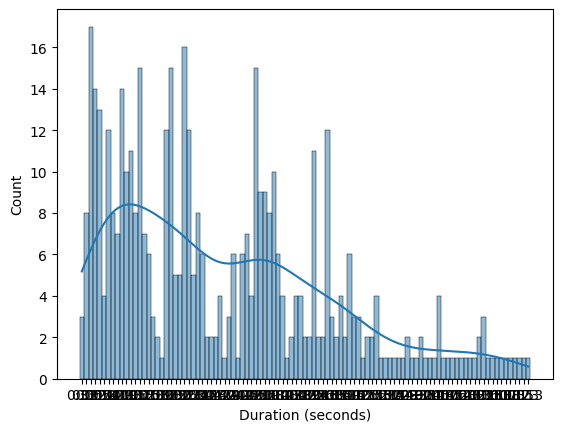

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df2 and the duration column is called "duration"
duration_data = df4["length"]

# Print minimum and maximum duration
print("Minimum duration:", duration_data.min())
print("Maximum duration:", duration_data.max())

# Create histogram with KDE plot
sns.histplot(duration_data, bins=50, kde=True)

# Set x and y axis labels
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")

# Show the plot
plt.show()


In [ ]:
def is_desert(latitude, longitude):
    # Check if the latitude and longitude fall within the range of the Thar Desert
    if latitude >= 24.6 and latitude <= 30.5 and longitude >= 68.7 and longitude <= 75.3:
        return 1
    else:
        return 0

# Apply the is_desert function to the latitude and longitude columns
df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])

df5=df4.drop(['loc','lat','lng'],axis=1)
df5

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in is_desert (vectorized)
  outputs = ufunc(*inputs)
<ipython-input-19-6c842a43dd23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])


,id,en,file,length,Desert/Non-Desert
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1
...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0


In [ ]:
df5.isnull().sum()

id                   0
en                   0
file                 0
length               0
Desert/Non-Desert    0
dtype: int64

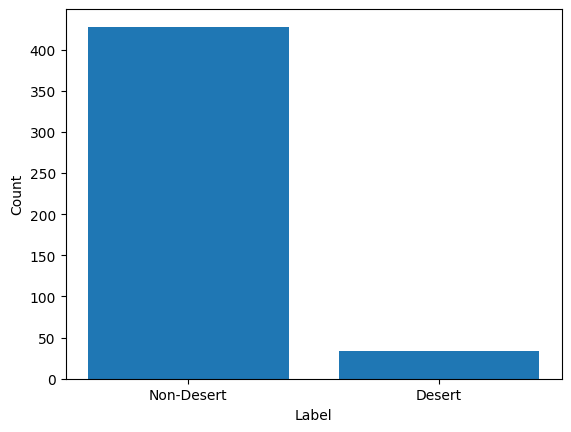

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df5 and the "desert/non desert" column is called "label"
label_counts = df5["Desert/Non-Desert"].value_counts()

# Create bar graph
plt.bar(label_counts.index, label_counts.values)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Count")

# Set x axis tick labels
plt.xticks([0, 1], ["Non-Desert", "Desert"])

# Show the plot
plt.show()


In [ ]:
desert_rows = df5[df5["Desert/Non-Desert"] == 1]
print("Rows with Desert label:\n", desert_rows)

Rows with Desert label:
          id                      en                                    file  \
0    796874          Grey Francolin  https://xeno-canto.org/796874/download   
10   351857          Grey Francolin  https://xeno-canto.org/351857/download   
12   167566          Grey Francolin  https://xeno-canto.org/167566/download   
28   308191          Grey Francolin  https://xeno-canto.org/308191/download   
29   308183          Grey Francolin  https://xeno-canto.org/308183/download   
34   165833          Grey Francolin  https://xeno-canto.org/165833/download   
35   149584          Grey Francolin  https://xeno-canto.org/149584/download   
36   149582          Grey Francolin  https://xeno-canto.org/149582/download   
37   129278          Grey Francolin  https://xeno-canto.org/129278/download   
69   460278          Purple Sunbird  https://xeno-canto.org/460278/download   
86   165447          Purple Sunbird  https://xeno-canto.org/165447/download   
88   149562          Purple

In [ ]:
bird_names = desert_rows["en"].unique()


bird_counts = {}


for bird in bird_names:
    count = desert_rows[desert_rows["en"] == bird].shape[0]
    bird_counts[bird] = count

for bird, count in bird_counts.items():
    print(f"{bird}: {count}")

Grey Francolin: 9
Purple Sunbird: 5
Common Tailorbird: 1
Red-vented Bulbul: 2
Indian Peafowl: 2
Tawny Pipit: 2
Common Babbler: 2
Wire-tailed Swallow: 2
Indian Black-lored Tit: 2
Northern Raven: 4
Hume's Leaf Warbler: 3


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=ff55171792c0e79bbf9f91d5977f27fd92d89e5cbd3c19d605c56cc1b6c625da
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
download_path = data_dir

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1
...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0


In [ ]:






for index, row in df5.iterrows():
    xc_id = row['id']
    audio_url = row['file']
    if audio_url:
        filename = f"{xc_id}.mp3"
        filepath = os.path.join(download_path, filename)
        if not os.path.exists(filepath):
            print(f"Downloading audio {xc_id}...")
            wget.download(audio_url, filepath)
        else:
            print(f"Audio {xc_id} already downloaded.")


Audio 796874 already downloaded.
Audio 472717 already downloaded.
Audio 459199 already downloaded.
Audio 441379 already downloaded.
Audio 351857 already downloaded.
Audio 337047 already downloaded.
Audio 167566 already downloaded.
Audio 149685 already downloaded.
Audio 149684 already downloaded.
Audio 94589 already downloaded.
Audio 575657 already downloaded.
Audio 474849 already downloaded.
Audio 469359 already downloaded.
Audio 459288 already downloaded.
Audio 459287 already downloaded.
Audio 451799 already downloaded.
Audio 406118 already downloaded.
Audio 334051 already downloaded.
Audio 332453 already downloaded.
Audio 308191 already downloaded.
Audio 308183 already downloaded.
Audio 199108 already downloaded.
Audio 194204 already downloaded.
Audio 166155 already downloaded.
Audio 165833 already downloaded.
Audio 149584 already downloaded.
Audio 149582 already downloaded.
Audio 129278 already downloaded.
Audio 619357 already downloaded.
Audio 442342 already downloaded.
Audio 74555

In [ ]:
def extract_max_energy(S, sr):
    # Remove noise
    S = librosa.decompose.nn_filter(S, aggregate=np.median, metric='cosine')

    # Find the 5-second window with the maximum energy
    window_size_frames =5* sr  // 512  # 512 is the default hop length used by librosa
    num_windows = S.shape[1] // window_size_frames
    #print(window_size_frames, num_windows)

    max_energy = 0
    max_start = 0
    for i in range(num_windows):
        start = i * window_size_frames
        end = start + window_size_frames
        energy = np.sum(S[:, start:end])
        if energy > max_energy:
            max_energy = energy
            max_start = start
    max_end = max_start + window_size_frames
   # print(max_start, max_end)
    # Extract the 5 seconds of spectrogram with maximum energy
    S_max_energy = S[:, max_start:max_end]

    return S_max_energy


In [ ]:
df5['Spectrogram'] = None

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1,None
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,None
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,None
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,None
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,None
...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0,None
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0,None
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0,None
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0,None


In [ ]:
import librosa.display as ld
spectrogram_dir = '/content/gdrive/MyDrive/spectrogram_data'


os.makedirs(spectrogram_dir, exist_ok=True)

for index, row in df5.iterrows():
    file_name = f"{row['id']}.mp3"
    file_path = os.path.join(data_dir, file_name)
    spectrogram_file = f"{row['id']}_spectrogram.npy"
    spectrogram_path = os.path.join(spectrogram_dir, spectrogram_file)

    # Check if spectrogram file exists, and if so, load it
    if os.path.isfile(spectrogram_path):
        S2 = np.load(spectrogram_path)
    else:
        # Load the audio file and compute the spectrogram
        y, sr = librosa.load(file_path)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S2 = extract_max_energy(S, sr)  # Assuming extract_max_energy is defined
        np.save(spectrogram_path, S2)  # Save the extracted spectrogram

    # Plot the spectrogram (if needed)
    # ...
    # You can use the code you provided for plotting the spectrogram here

    df5.at[index, 'Spectrogram'] = S2
    '''
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S2, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']} Denoised)")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']})")
    plt.tight_layout()
    plt.show()
    '''
    df5.at[index, 'Spectrogram'] = S2

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1,"[[1.784749e-09, 1.9392543e-09, 1.7443029e-09, ..."
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,"[[0.0013777143, 0.0015780414, 0.0006839348, 0...."
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,"[[0.0196735, 0.011847297, 0.012750082, 0.01367..."
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,"[[0.13824023, 0.13824023, 0.13824023, 0.125113..."
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,"[[0.0027273414, 0.0025376135, 0.0024076584, 0...."
...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0,"[[0.051411375, 0.053026512, 0.04670254, 0.0598..."
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0,"[[8.660332, 26.508755, 22.510593, 24.130413, 2..."
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0,"[[0.2968467, 0.28199393, 0.21437094, 0.2054627..."
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0,"[[0.0009708515, 0.0012644494, 0.001223997, 0.0..."


In [ ]:
import pandas as pd
import datetime
# Convert duration to seconds
df5['duration_sec'] = df5['length'].apply(lambda x: datetime.datetime.strptime(x, '%M:%S').time())
df5['duration_sec'] = df5['duration_sec'].apply(lambda x: 60*x.minute + x.second)

# Remove rows with duration less than 5 seconds
df5 = df5[df5['duration_sec'] >= 5]

# Drop the duration_sec column
df5.drop('duration_sec', axis=1, inplace=True)


<ipython-input-34-dbfc86bfe691>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop('duration_sec', axis=1, inplace=True)


In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1,"[[1.784749e-09, 1.9392543e-09, 1.7443029e-09, ..."
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,"[[0.0013777143, 0.0015780414, 0.0006839348, 0...."
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,"[[0.0196735, 0.011847297, 0.012750082, 0.01367..."
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,"[[0.13824023, 0.13824023, 0.13824023, 0.125113..."
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,"[[0.0027273414, 0.0025376135, 0.0024076584, 0...."
...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0,"[[0.051411375, 0.053026512, 0.04670254, 0.0598..."
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0,"[[8.660332, 26.508755, 22.510593, 24.130413, 2..."
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0,"[[0.2968467, 0.28199393, 0.21437094, 0.2054627..."
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0,"[[0.0009708515, 0.0012644494, 0.001223997, 0.0..."


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

#t-test#

In [ ]:
desert_spectrograms=[]
non_desert_spectrograms=[]

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1,"[[1.784749e-09, 1.9392543e-09, 1.7443029e-09, ..."
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,"[[0.0013777143, 0.0015780414, 0.0006839348, 0...."
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,"[[0.0196735, 0.011847297, 0.012750082, 0.01367..."
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,"[[0.13824023, 0.13824023, 0.13824023, 0.125113..."
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,"[[0.0027273414, 0.0025376135, 0.0024076584, 0...."
...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0,"[[0.051411375, 0.053026512, 0.04670254, 0.0598..."
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0,"[[8.660332, 26.508755, 22.510593, 24.130413, 2..."
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0,"[[0.2968467, 0.28199393, 0.21437094, 0.2054627..."
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0,"[[0.0009708515, 0.0012644494, 0.001223997, 0.0..."


9 20


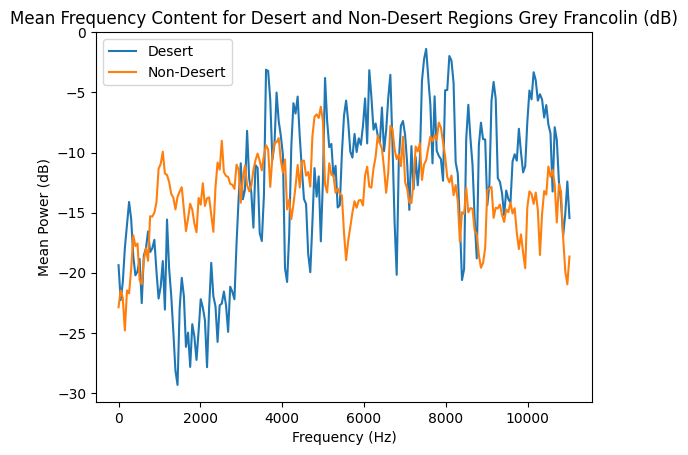

T-statistic: 0.5416777351448498
P-value: 0.5880653771825937
5 36


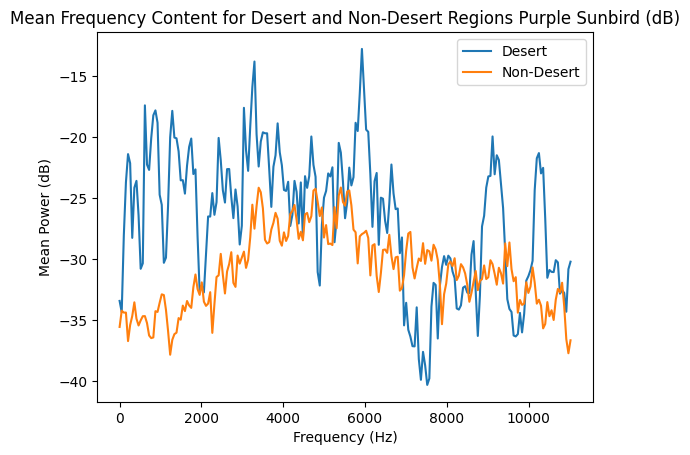

T-statistic: 7.427281695170519
P-value: 1.7563266313435408e-13
1 81


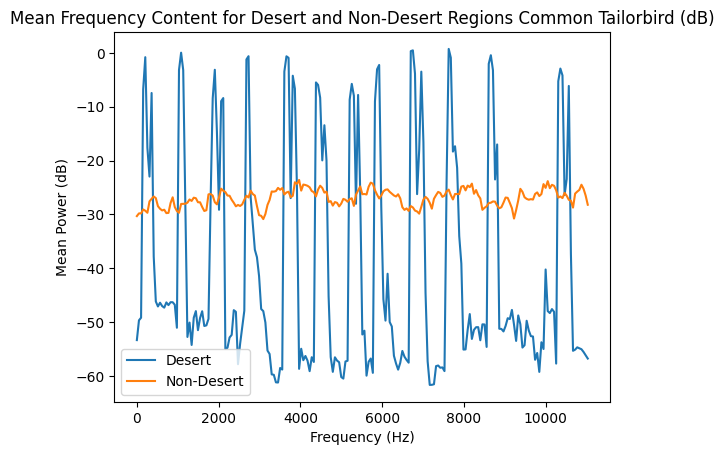

T-statistic: -9.152875361581701
P-value: 3.745705964680263e-17
2 59


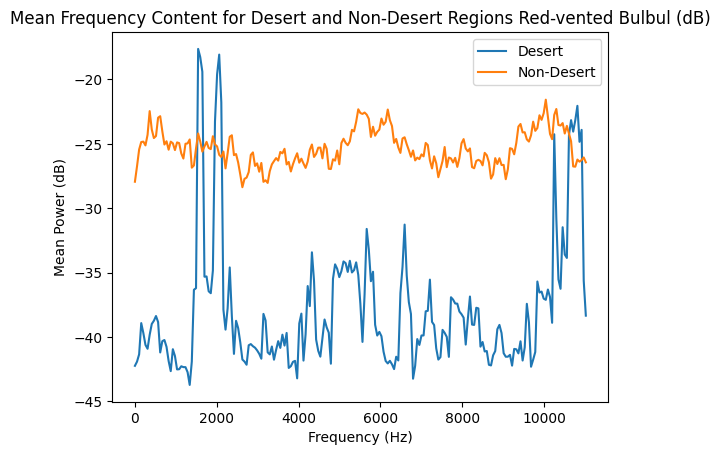

T-statistic: -13.842625675658418
P-value: 4.686536865973325e-37
2 26


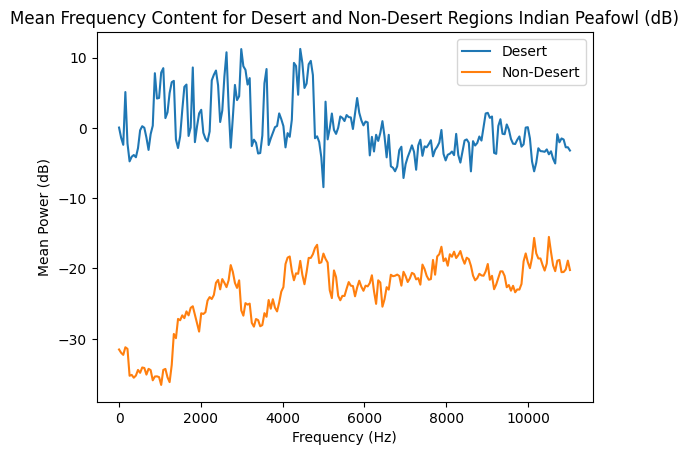

T-statistic: 28.715431877301054
P-value: 1.313890896499129e-118
2 11


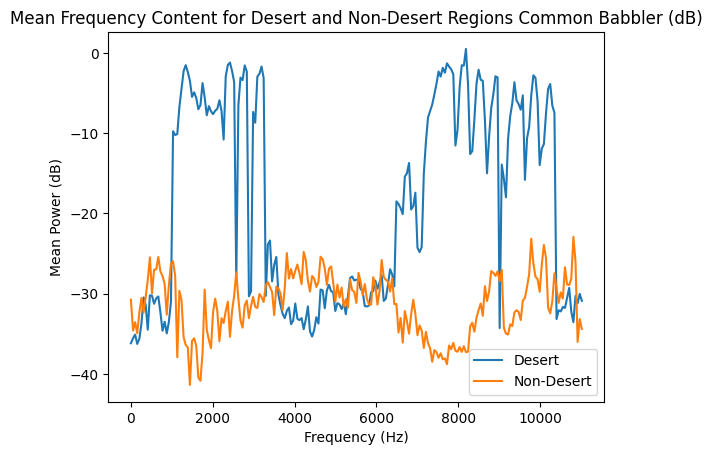

T-statistic: 12.888669584272758
P-value: 4.799464709555284e-34
2 2


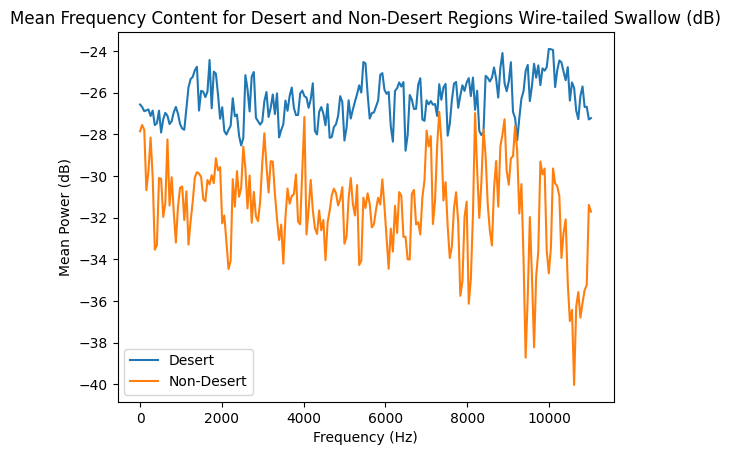

T-statistic: 24.307717129764157
P-value: 1.0857720578345439e-88
2 10


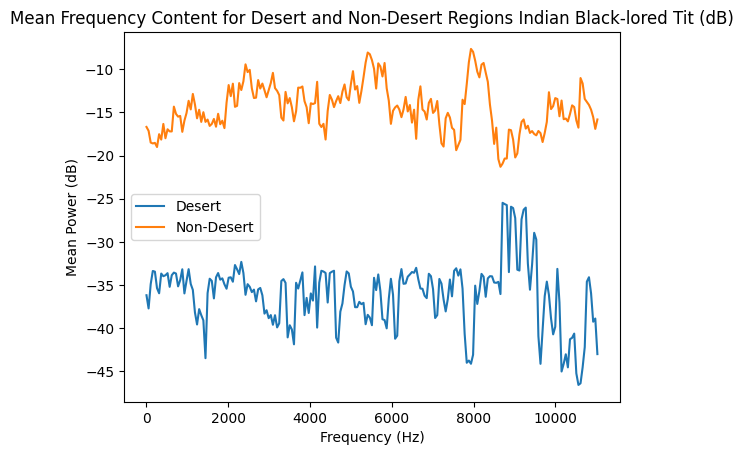

T-statistic: -25.112908541506048
P-value: 7.086125357019455e-105
4 2


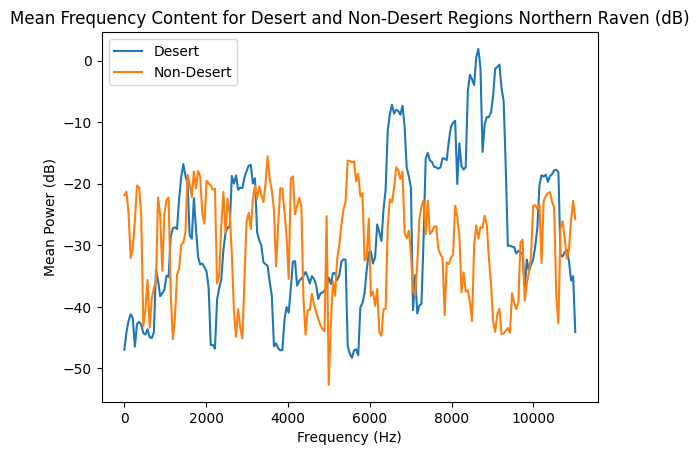

T-statistic: 1.4096357004853068
P-value: 0.15904304236183558
3 47


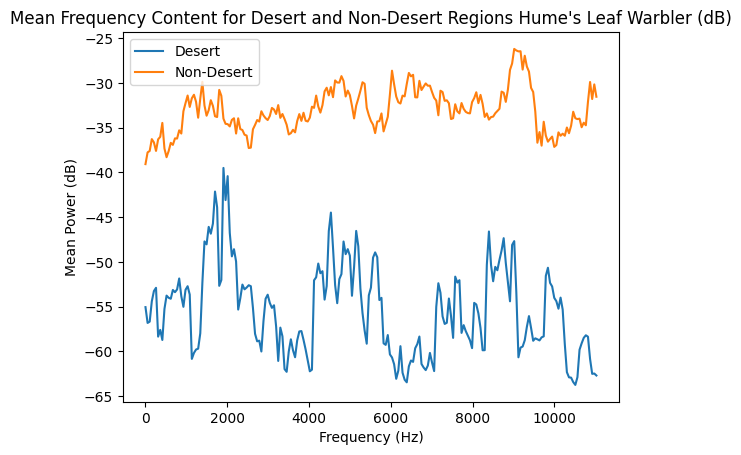

T-statistic: -46.526191877683544
P-value: 5.713007115773929e-280


In [ ]:

import os
import requests
from scipy.stats import *
for species in df5['en'].unique():
    desert_spectrograms=[]
    non_desert_spectrograms=[]
    for index,row in df5[df5['en'] == species].iterrows():
        file_name = f"{row['id']}.mp3"
        file_path = os.path.join(data_dir, file_name)

        # Check if audio file exists, and if not, download it
        if not os.path.isfile(file_path):
          audio_url = 'https:'+row['file']
          audio_data = requests.get(audio_url).content
          with open(file_path, 'wb') as handler:
              handler.write(audio_data)

        # Load audio file

        try:
            y, sr = librosa.load(file_path)
        except Exception as e:
            print(f"Error loading audio file: {e}")
            continue



        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S2 = extract_max_energy(S, sr)

        if row['Desert/Non-Desert']==1:
            desert_spectrograms.append(S2)
        else:
            non_desert_spectrograms.append(S2)

      # Check if the length of either desert or non-desert spectrograms is zero and continue to the next species if so
    if len(desert_spectrograms) == 0 or len(non_desert_spectrograms) == 0:
      continue
    print(len(desert_spectrograms),len(non_desert_spectrograms))
    # Compute the average power in different frequency bands for each region (replace with your own frequency bands)


    # ...
    # Compute the average power in different frequency bands for each region (replace with your own frequency bands)
    desert_freq = np.mean(np.abs(desert_spectrograms)**2, axis=1)
    non_desert_freq = np.mean(np.abs(non_desert_spectrograms)**2, axis=1)

    # Convert the mean power values to decibels
    desert_freq_db = 10 * np.log10(desert_freq)
    non_desert_freq_db = 10 * np.log10(non_desert_freq)

    # Compute the frequency range of the spectrograms
    freq_range = np.linspace(0, 22050/2, 215)

    # Plot the mean frequency content for each region in decibels
    fig, ax = plt.subplots()
    ax.plot(freq_range, np.mean(desert_freq_db, axis=0), label='Desert')
    ax.plot(freq_range, np.mean(non_desert_freq_db, axis=0), label='Non-Desert')

    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Mean Power (dB)')
    ax.set_title(f'Mean Frequency Content for Desert and Non-Desert Regions {species} (dB)')
    ax.legend()
    plt.show()

    # Perform a two-sample t-test to compare the mean frequency content between the two regions
    t_stat, p_value = ttest_ind(desert_freq_db.flatten(), non_desert_freq_db.flatten(), equal_var=False)

    print('T-statistic:', t_stat)
    print('P-value:', p_value)



#Autoencoder#

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
0,796874,Grey Francolin,https://xeno-canto.org/796874/download,0:37,1,"[[1.784749e-09, 1.9392543e-09, 1.7443029e-09, ..."
7,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,"[[0.0013777143, 0.0015780414, 0.0006839348, 0...."
8,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,"[[0.0196735, 0.011847297, 0.012750082, 0.01367..."
9,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,"[[0.13824023, 0.13824023, 0.13824023, 0.125113..."
10,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,"[[0.0027273414, 0.0025376135, 0.0024076584, 0...."
...,...,...,...,...,...,...
666,105580,Hume's Leaf Warbler,https://xeno-canto.org/105580/download,0:19,0,"[[0.051411375, 0.053026512, 0.04670254, 0.0598..."
667,91910,Hume's Leaf Warbler,https://xeno-canto.org/91910/download,0:05,0,"[[8.660332, 26.508755, 22.510593, 24.130413, 2..."
668,73381,Hume's Leaf Warbler,https://xeno-canto.org/73381/download,0:18,0,"[[0.2968467, 0.28199393, 0.21437094, 0.2054627..."
669,19290,Hume's Leaf Warbler,https://xeno-canto.org/19290/download,0:33,0,"[[0.0009708515, 0.0012644494, 0.001223997, 0.0..."


In [ ]:
# Filter the rows where 'Desert/Non-Desert' is 1 (desert species)
all_desert_spectrograms = df5.loc[df5['Desert/Non-Desert'] == 1, 'Spectrogram'].tolist()

# Filter the rows where 'Desert/Non-Desert' is not 1 (non-desert species)
all_non_desert_spectrograms = df5.loc[df5['Desert/Non-Desert'] != 1, 'Spectrogram'].tolist()

# Continue with further processing using all_desert_spectrograms and all_non_desert_spectrograms


In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Combine desert and non-desert spectrograms into a single dataset
all_spectrograms = np.concatenate((all_desert_spectrograms, all_non_desert_spectrograms), axis=0)

# Flatten the spectrograms for use with a fully connected autoencoder
all_spectrograms_flat = all_spectrograms.reshape((all_spectrograms.shape[0], -1))

# Normalize the data to the [0, 1] range
scaler = MinMaxScaler()
all_spectrograms_flat = scaler.fit_transform(all_spectrograms_flat)

# Split the data into training and testing sets
X_train, X_test = train_test_split(all_spectrograms_flat, test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 12  # Dimension of the encoded representation

# Input layer
input_spectrogram = Input(shape=(input_dim,))

# Encoding layers
encoded = Dense(encoding_dim, activation='relu')(input_spectrogram)
encoded = Dense(encoding_dim // 2, activation='relu')(encoded)

# Decoding layers
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)  # Use linear activation

# Define the autoencoder model
autoencoder = Model(input_spectrogram, decoded)

# Define the encoder model (for encoding the data)
encoder = Model(input_spectrogram, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')  # Use a smaller learning rate

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

# Encode and decode the test data
encoded_spectrograms = encoder.predict(X_test)
decoded_spectrograms = autoencoder.predict(X_test)

# Reshape the decoded spectrograms to their original shape
decoded_spectrograms = decoded_spectrograms.reshape((-1, all_spectrograms.shape[1], all_spectrograms.shape[2]))

# ... You can now visualize and analyze the encoded and decoded spectrograms


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


11/11 [==============================] - 1s 38ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 3/50
11/11 [==============================] - 0s 25ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 4/50
11/11 [==============================] - 0s 24ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/50
11/11 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 6/50
11/11 [==============================] - 0s 22ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 7/50
11/11 [==============================] - 0s 26ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 8/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/50
11/11 [==============================] - 0s 22ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/50
11/11 [==============================] - 0s 22ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 11/50
11/11 [=

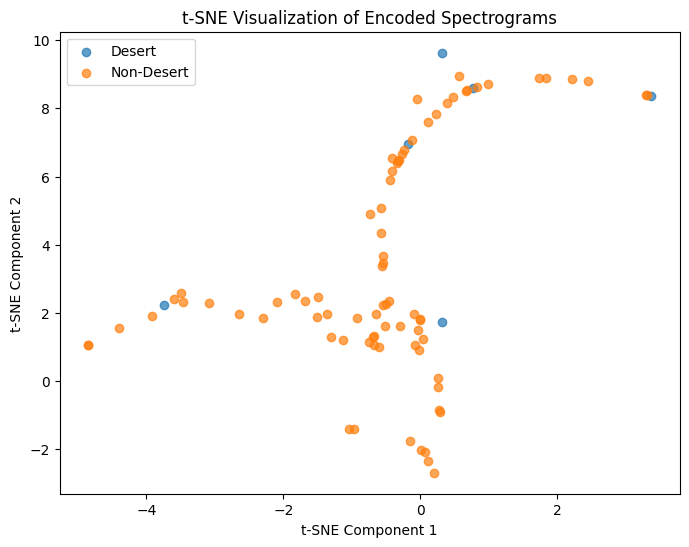

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Split the data into training and testing sets, and keep track of the indices
X_train, X_test, train_indices, test_indices = train_test_split(
    all_spectrograms_flat, np.arange(all_spectrograms_flat.shape[0]), test_size=0.2, random_state=42
)

# Train the autoencoder and obtain encoded_spectrograms (as in your previous code)

# Perform t-SNE on the encoded spectrograms
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(encoded_spectrograms)

# Get the labels for the test data (desert or non-desert) for visualization
test_labels = df5.loc[df5.index.isin(df5.index[test_indices]), 'Desert/Non-Desert']

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[test_labels == 1, 0], tsne_results[test_labels == 1, 1], label='Desert', alpha=0.7)
plt.scatter(tsne_results[test_labels != 1, 0], tsne_results[test_labels != 1, 1], label='Non-Desert', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Encoded Spectrograms')
plt.legend()
plt.show()
